# Interfaceing HDF5 files following the Standard Name Convention

Let's remember, that standard names are set to identify certain datasets in the HDF5 file. Those datasets have a special meaning to the user and are likely to be frequently used in the analysis of the data.

For this purpose a high-level interface `HDF5StandardNameInterface` is written, which facilitates the work with such HDF5 data.
It scans the HDF5 file for all standard names and creates a class property for each

In [3]:
import h5rdmtoolbox as h5tbx

from h5rdmtoolbox.conventions.standard_names import HDF5StandardNameInterface

import numpy as np

cv = h5tbx.conventions.from_zenodo('https://zenodo.org/record/8357399')
cv.properties[h5tbx.File]['data_type'].make_optional()
cv.properties[h5tbx.File]['contact'].make_optional()
h5tbx.use(cv)

Convention "h5rdmtoolbox-tutorial-convention" filename: C:\Users\da4323\AppData\Local\h5rdmtoolbox\h5rdmtoolbox\cache\10.5281_zenodo.8357399
creating directory for the convention
No special functions defined
Found 0 function(s) in C:\Users\da4323\AppData\Local\h5rdmtoolbox\h5rdmtoolbox\conventions\h5rdmtoolbox_tutorial_convention\h5rdmtoolbox_tutorial_convention.py


using("h5rdmtoolbox-tutorial-convention")

In [4]:
with h5tbx.File() as h5:
    h5.create_dataset('x', data=[-4, 1, 3, 5, 10],
                      standard_name='x_coordinate',
                      units='m', make_scale=True)
    h5.create_dataset('y', data=[10, 11, 13],
                      standard_name='y_coordinate',
                      units='m', make_scale=True)
    h5.create_dataset('u', np.random.rand(3, 5),
                      standard_name='x_velocity',
                      units='m/s',
                      attach_scales=('y', 'x'))
    h5.create_dataset('v', np.random.rand(3, 5),
                      standard_name='y_velocity',
                      units='m/s',
                      attach_scales=('y', 'x'))
    h5.create_dataset('dudx', np.random.rand(3, 5),
                      standard_name='derivative_of_x_velocity_wrt_x_coordinate',
                      units='1/s')

In [5]:
h5sni = HDF5StandardNameInterface.from_hdf(h5.hdf_filename)
h5sni.standard_names

['x_coordinate',
 'y_coordinate',
 'derivative_of_x_velocity_wrt_x_coordinate',
 'y_velocity',
 'x_velocity']

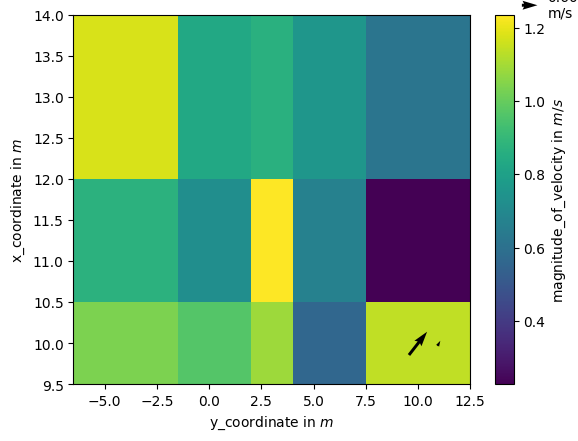

In [6]:
h5sni.velocity.plot()
h5sni.velocity.plot.quiver()